# IE 582

## Homework 2 by Cemre Çelebi


#### The aim of this homework is applying dimensionality reduction for time series data from eight users to characterize eight gesture patterns.

In [9]:
#Reading data
dataX <- as.matrix(read.table("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW2/uWave/uWaveGestureLibrary_X_TRAIN"))
dataY <- as.matrix(read.table("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW2/uWave/uWaveGestureLibrary_Y_TRAIN"))
dataZ <- as.matrix(read.table("/Users/cemrecelebi/Desktop/courses20-21fall/IE 582/HW2/uWave/uWaveGestureLibrary_Z_TRAIN"))

In [10]:
#head(dataX)
#head(dataY)
#head(dataZ)
library(tidyverse)
library(dplyr)
library(tidyr)

data <- data.frame(dataX,dataY[,-1],dataZ[,-1])

##### it should be careful while rerunning this part because of following three comment below!

#show(data)
#show(dataX)
#show(dataY)
#show(dataZ)
#str(dataX)
#length(dataX)
#head(data)


for (i in c(2:ncol(dataX))){
  colnames(dataX)[i] =  i-1
  colnames(dataY)[i] =  i-1
  colnames(dataZ)[i] =  i-1  
}

class <- c()

for(i in 8){ 
 class <- data %>% append(match(i, data$gesture))}
class <- as.factor(class$V1)
#str(class)


In [11]:
#str(data)
veloX <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))
posiX <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))
veloY <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))
posiY <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))
veloZ <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))
posiZ <- matrix(0,nrow=nrow(dataX),ncol=ncol(dataX))

#Since we have acceleration information, it is transformed to velocity vector by calculating cumulative
#sum of acceleration over time.

  veloX <- t(apply(dataX[,-1],1,cumsum))
  posiX <- t(apply(veloX, 1, cumsum))
    
  veloY <- t(apply(dataY[,-1],1,cumsum))
  posiY <- t(apply(veloY, 1, cumsum))
    
  veloZ <- t(apply(dataZ[,-1],1,cumsum))
  posiZ <- t(apply(veloZ, 1, cumsum)) 


In [12]:
#taking one instance form each class

posiX =cbind(class,posiX)
posiY =cbind(class,posiY)
posiZ =cbind(class,posiZ)
posiX<-as.data.frame(posiX)
posiY<-as.data.frame(posiY)
posiZ<-as.data.frame(posiZ)



In [13]:
#str(posiX)
#samplesx<-c()
#samplesy<-c()
#samplesz<-c()
#samples <- posiX[unique(sample$class),]
#for(i in 1:8){
#samplesx <- posiX %>% unique(,class==i, "INDIV")
 #  samplesy <- posiY %>% unique(,class==i,"INDIV")
 #   samplesz <- posiZ %>% unique(,class==i,"INDIV")
    
  #  }
#samplesx <- as.data.frame(samplesx)
#samplesy <- as.data.frame(samplesy)
#samplesz <- as.data.frame(samplesz)
#samplesx

samplex <- c()
sampley <- c()
samplez <- c()
for(i in 1:8)
{
samplex=append(samplex,list(cbind(t((posiX%>%filter(class==i))[1,-1]))))
    
    sampley=append(sampley,list(cbind(t((posiY%>%filter(class==i))[1,-1]))))
    samplez=append(samplez,list(cbind(t((posiZ%>%filter(class==i))[1,-1]))))
                           
    
}

#samplex[[4]][,1]

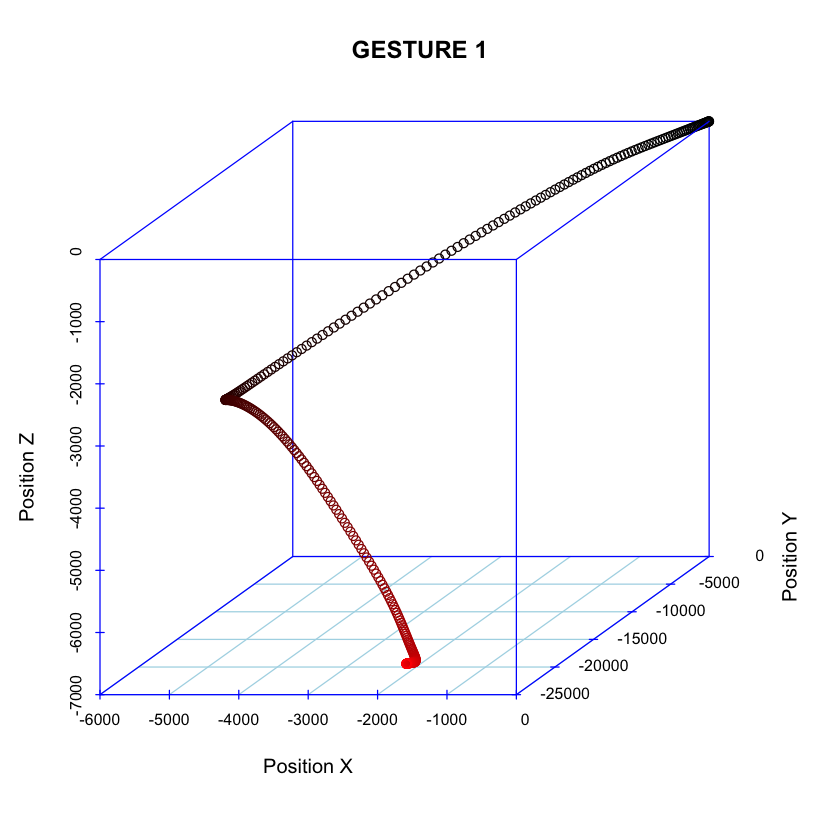

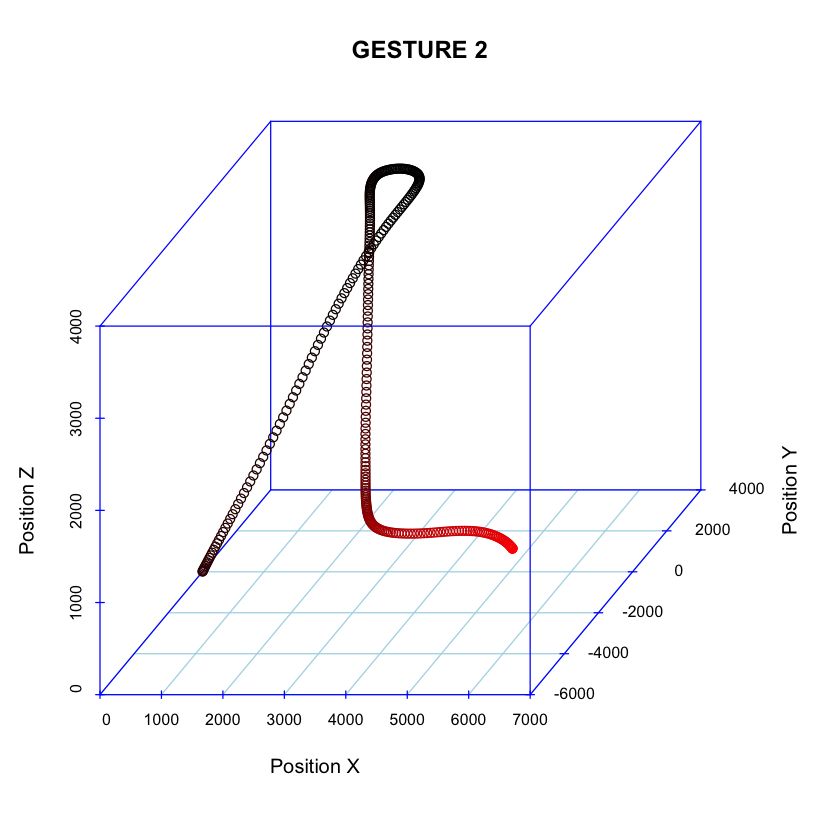

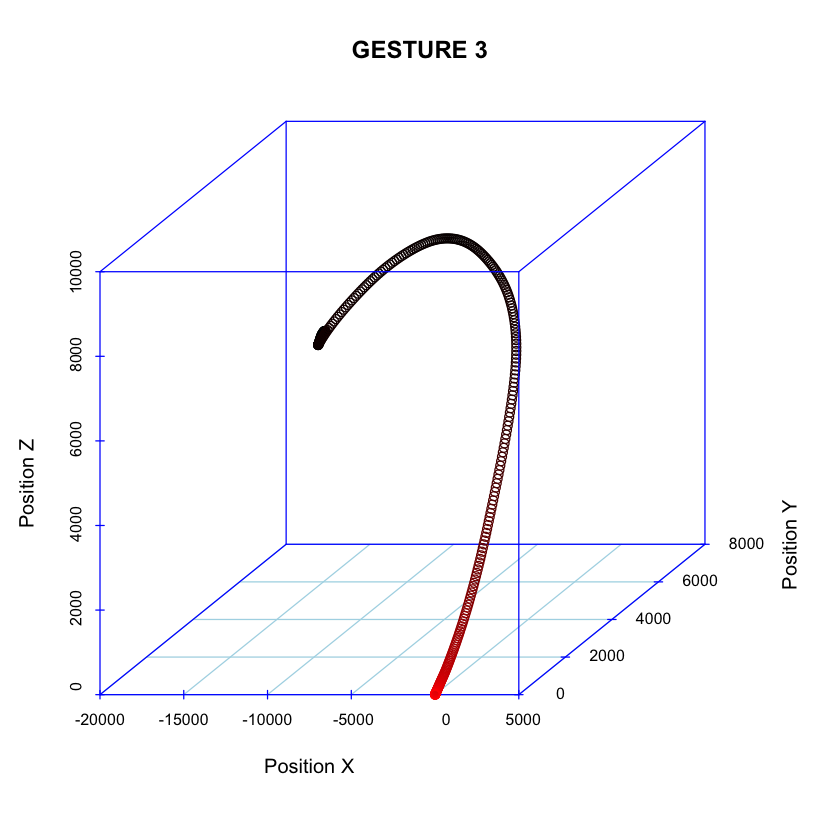

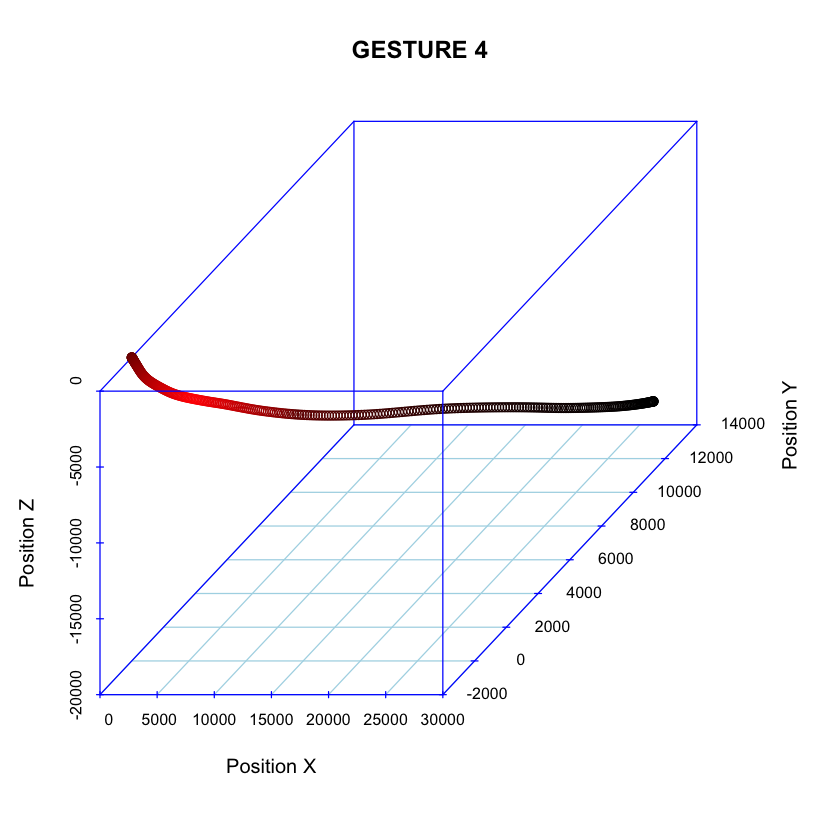

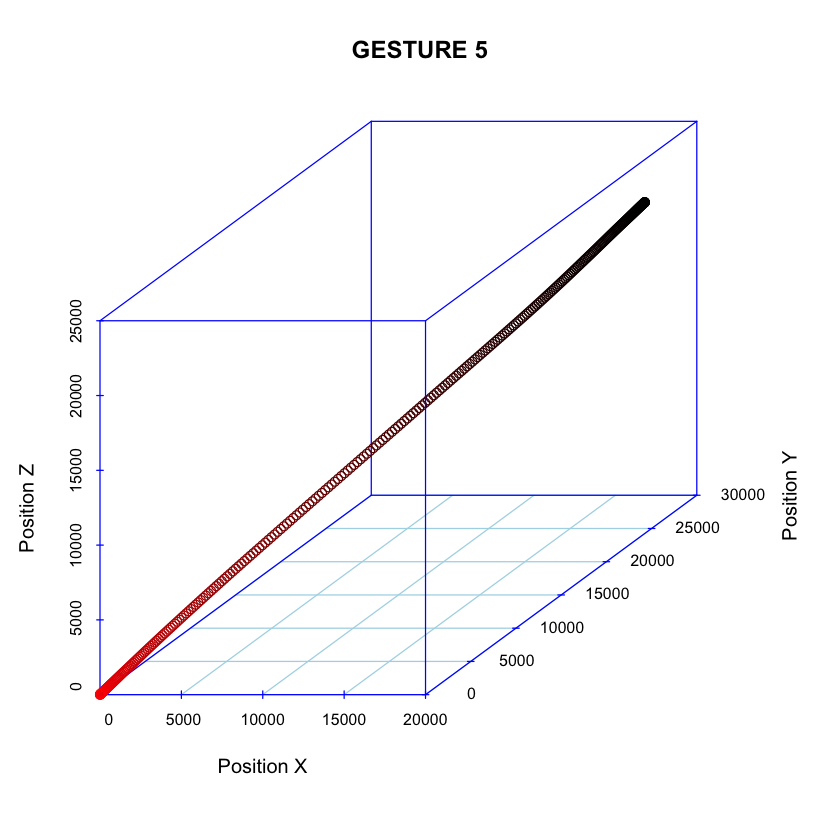

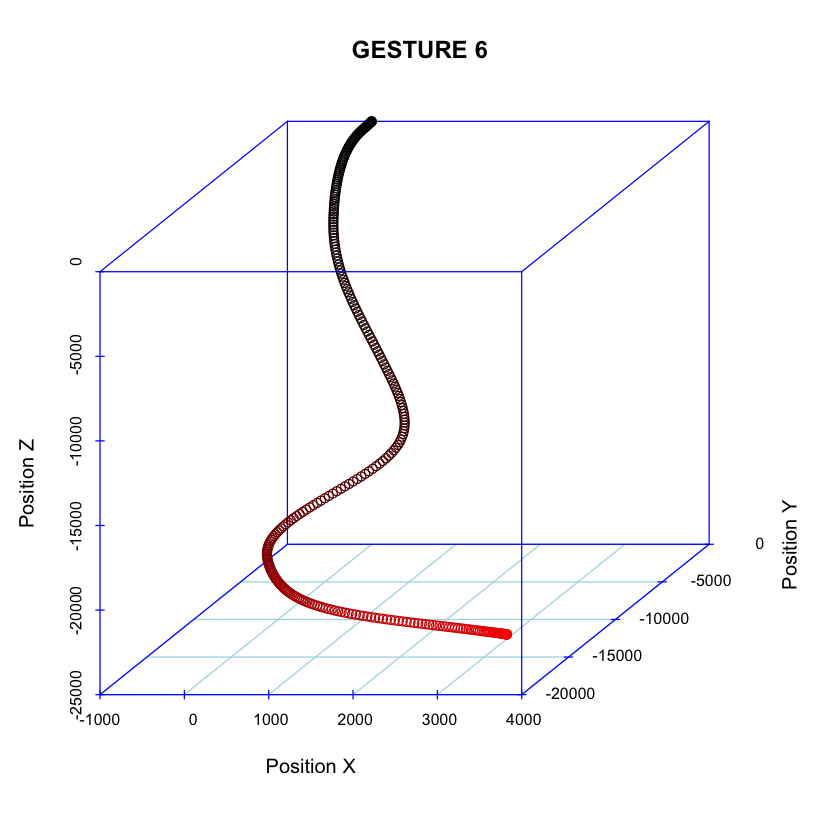

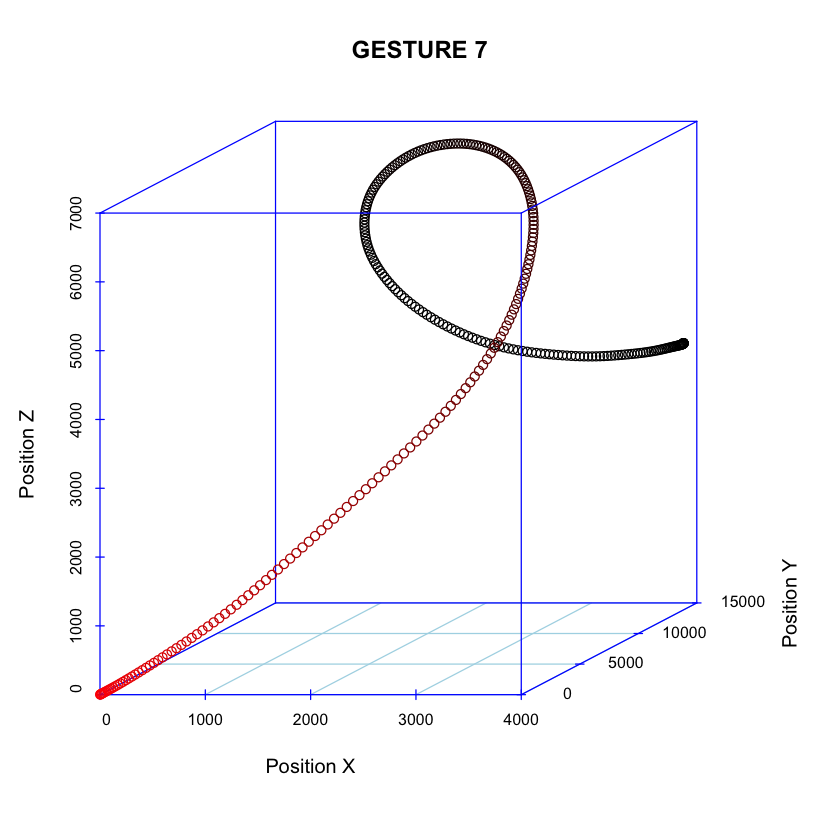

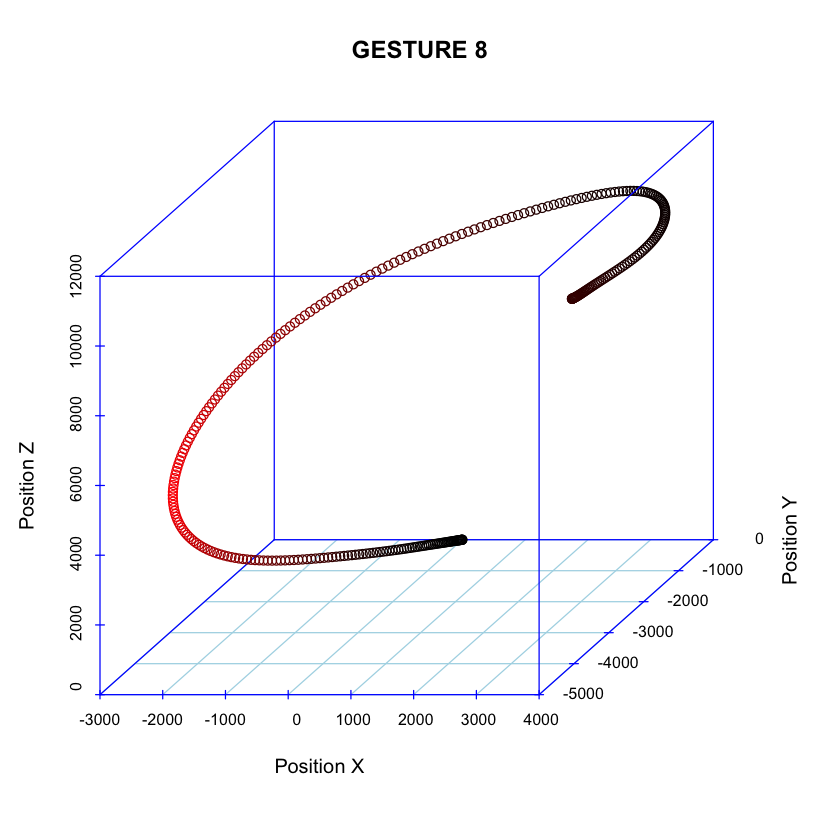

In [14]:
#Visualization

library(scatterplot3d)

for(i in 1:8){
   scatterplot3d(samplex[[i]][,1], sampley[[i]][,1], samplez[[i]][,1],  highlight.3d=TRUE,col.axis="blue", main = paste("GESTURE", i), xlab = "Position X", ylab = "Position Y", zlab = "Position Z", col.grid="lightblue",type = "p")

}
#for(i in 1:8){
#   scatterplot3d(posiX[class[i],], posiY[class[i],], posiZ[class[i],], col.axis="blue", main = paste("GESTURE", i), xlab = "Position X", ylab = "Position Y", zlab = "Position Z", col.grid="lightblue",type = "p", color = "steelblue")

#}

In [15]:
#B
#Creating Long Format by dimensionality reduction
#Reducing multivariate time series to a univariate one
#install.packages("tidyr")


library(dbplyr)
library(plyr)
library(tidyr)
library(data.table)

posiX<-as.data.frame(posiX)
posiY<-as.data.frame(posiY)
posiZ<-as.data.frame(posiZ)

colnames(posiX)[1] = "class"
colnames(posiY)[1] = "class"
colnames(posiZ)[1] = "class"

time_series_id = c(1:nrow(posiX))
dataX_wtime <- cbind(time_series_id, posiX)
dataY_wtime <- cbind(time_series_id, posiY)
dataZ_wtime <- cbind(time_series_id, posiZ)

dataX_long <- melt(data=dataX_wtime, id.vars= c("time_series_id","class"), variable.name= "time_index", value.name ="X")
dataY_long <- melt(data=dataY_wtime, id.vars= c("time_series_id","class"), variable.name= "time_index", value.name ="Y")
dataZ_long <- melt(data=dataZ_wtime, id.vars= c("time_series_id","class"), variable.name= "time_index", value.name ="Z")

longformat = cbind(dataX_long, dataY_long[4], dataZ_long[4])

order <- c("time_series_id", "time_index", "X","Y", "Z", "class")

longformat <- longformat[,order]
longformat



Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Warning message in melt(data = dataX_wtime, id.vars = c("time_series_id", "class"), :
“The melt generic in data.table has been p

time_series_id,time_index,X,Y,Z,class
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-0.304243210,-2.1193958,-1.52896510,6
2,1,1.627311100,0.6666239,1.78686880,5
3,1,0.661276530,-0.1897302,0.52124872,5
4,1,0.005184784,0.3740667,0.30945519,3
5,1,1.286197800,-0.3974369,-0.46602153,4
6,1,-0.479252460,-1.0800804,0.65640082,8
7,1,1.474327700,1.2592868,1.23741730,7
8,1,0.305302960,-0.3299549,-1.29871780,4
9,1,0.980810380,0.3823780,-0.69512873,4


In [16]:
# Reducing data from 3D to 1D by PCA regardless of time and class

pca = princomp(longformat[,3:5], cor=T)
print(summary(pca, loadings=T))

Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2724995 1.0380930 0.5505524
Proportion of Variance 0.5397517 0.3592124 0.1010360
Cumulative Proportion  0.5397517 0.8989640 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.209  0.908  0.362
Y  0.723  0.105 -0.683
Z  0.658 -0.404  0.635


##### According to pca calculation for all data, standard deviation is determined as 1.27 which has the value of 0.54 of proportion variance, which indicates that first component of pca result represent us the large amont of the solution. For this reason, this component is used to obtain 1D data set.

In [17]:

# since standard deviation of first component is higher than other components and it has highest covering percentage,
#component 1 is used to continue with univariate time series

univar = cbind(longformat$time_series_id, longformat$time_index, longformat$class, pca$scores[,1])
univar = data.frame(univar)
colnames(univar)[1] = "time_series_id"
colnames(univar)[2] = "time_index"
colnames(univar)[3] = "class"
colnames(univar)[4] = "PCA"
univar = data.frame(univar)


In [18]:
#Selecting 2 random time series from each class

rand1 = univar %>% filter(class == '1') %>% filter(time_series_id==206 | time_series_id==11)

rand2 = univar %>% filter(class == '2') %>% filter(time_series_id==688 | time_series_id==880)

rand3 = univar %>% filter(class == '3') %>% filter(time_series_id==13 | time_series_id==723)

rand4 = univar %>% filter(class == '4') %>% filter(time_series_id==5 | time_series_id==730)

rand5 = univar %>% filter(class == '5') %>% filter(time_series_id==766 | time_series_id==100)

rand6 = univar %>% filter(class == '6') %>% filter(time_series_id==22 | time_series_id==484)

rand7 = univar %>% filter(class == '7') %>% filter(time_series_id==624 | time_series_id==271)

rand8 = univar %>% filter(class == '8') %>% filter(time_series_id==882 | time_series_id==105)

rand = rbind(rand1, rand2, rand3, rand4, rand5, rand6, rand7, rand8)

rand= data.frame(rand)


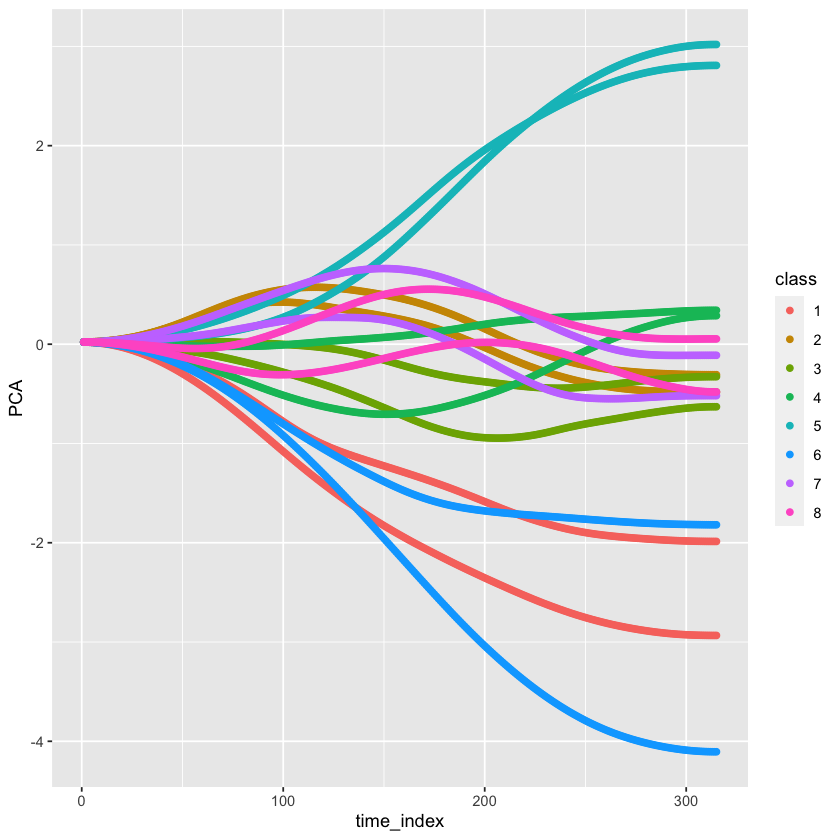

In [19]:
library(ggplot2)
#t<-ggplot(univar,aes(x=time_index,PCA,color=as.factor(class))) + geom_point(aes(color="Rand1"))+ geom_point(aes(color="Rand2")) + geom_point(aes(color="Rand3"))+ geom_point(aes(color="Rand4"))+ geom_point(aes(color="Rand5"))+ geom_point(aes(color="Rand6")) + geom_point(aes(color="Rand7"))+ geom_point(aes(color="Rand8"))
#t + xlab("time_series_id") + ylab("PCA") + labs(colour=' ')

t <- ggplot(rand) + geom_point(aes(x=time_index, y=PCA, colour=as.factor(class))) 
t+ xlab("time_index") + ylab("PCA") + scale_color_discrete(name = "class")


##### When the PCA results of two random time series are shown in Figure, it is seen that, some of the results of same class show very similar pattern such as time series in 2nd class. However, time series from some classes have different pattern such as 8th class.

In [20]:
#C

long1 <- longformat %>% filter(class == '1')
long2 <- longformat %>% filter(class == '2')
long3 <- longformat %>% filter(class == '3')
long4 <- longformat %>% filter(class == '4')
long5 <- longformat %>% filter(class == '5')
long6 <- longformat %>% filter(class == '6')
long7 <- longformat %>% filter(class == '7')
long8 <- longformat %>% filter(class == '8')

pca1 = princomp(long1[,3:5], cor=T)
print(summary(pca1, loadings=T))

pca2 = princomp(long2[,3:5], cor=T)
print(summary(pca2, loadings=T))

pca3 = princomp(long3[,3:5], cor=T)
print(summary(pca3, loadings=T))

pca4 = princomp(long4[,3:5], cor=T)
print(summary(pca4, loadings=T))

pca5 = princomp(long5[,3:5], cor=T)
print(summary(pca5, loadings=T))

pca6 = princomp(long6[,3:5], cor=T)
print(summary(pca6, loadings=T))

pca7 = princomp(long7[,3:5], cor=T)
print(summary(pca7, loadings=T))

pca8 = princomp(long7[,3:5], cor=T)
print(summary(pca8, loadings=T))


Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2932492 1.0091473 0.5559931
Proportion of Variance 0.5574978 0.3394594 0.1030428
Cumulative Proportion  0.5574978 0.8969572 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.119  0.973  0.198
Y  0.693 -0.224  0.685
Z  0.711        -0.701
Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.1286537 0.9457021 0.9120243
Proportion of Variance 0.4246197 0.2981175 0.2772628
Cumulative Proportion  0.4246197 0.7227372 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.535  0.814  0.224
Y  0.613 -0.192 -0.767
Z  0.581 -0.548  0.602
Importance of components:
                          Comp.1    Comp.2    Comp.3
Standard deviation     1.2156489 1.0027730 0.7187794
Proportion of Variance 0.4926008 0.3351846 0.1722146
Cumulative Proportion  0.4926008 0.8277854 1.0000000

Loadings:
  Comp.1 Comp.2 Comp.3
X  0.709         0.705
Y  0.371  0.847 -0.380


##### When PCA results of each class are compared with the PCA result on all data frame, it is seen that  the standard deviation value of first component of PCA analysis is very similar with the result obtained from all data. In addition to this, proportion of variance for first component of PCA also shows similarity with the result obrained for all data frame. For each class, first component has higher proportion of variance then others.

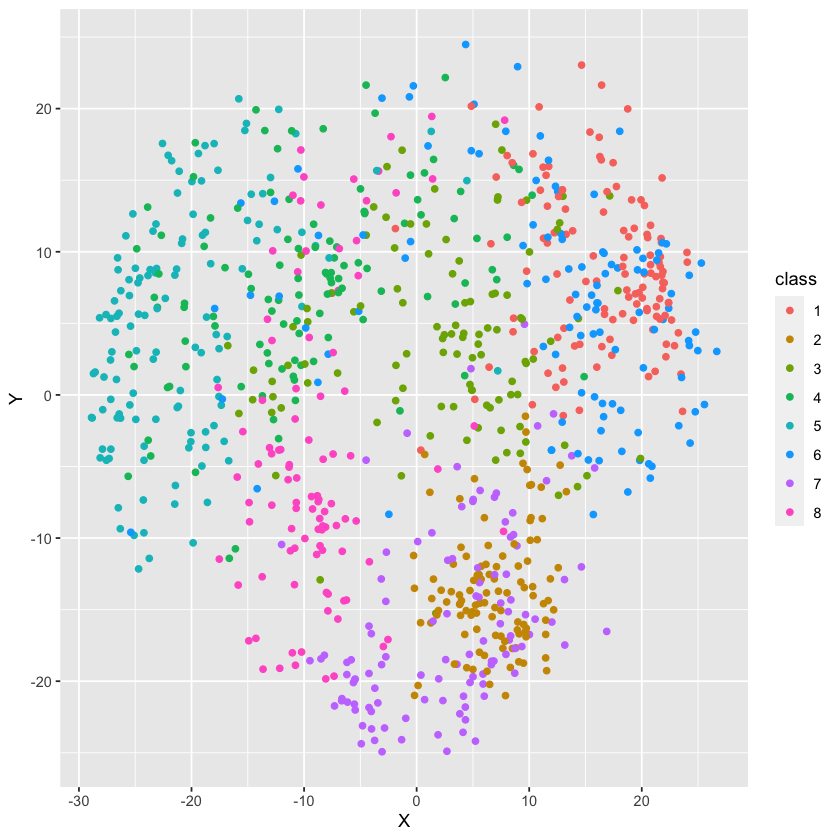

In [21]:
#D

data[,-1] <- scale(data[,-1]) 
euclid <-dist(data[,-1], method = "euclidean")

twodim <- cmdscale(euclid, k=2)
twodim = cbind(class,twodim)
twodim = as.data.frame(twodim)
#twodim

ggplot(twodim) + geom_point(aes(x=V2, y=V3, color=as.factor(class))) + xlab("X") + ylab("Y") +scale_color_discrete(name = "class") 




##### When 2-dimensional time series figure is analyzed, it is understood that this is not the best approach to identify the gesture. For example, the gesture of class 2 can be identified from the figure, however, this is not the case for most classes.